In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


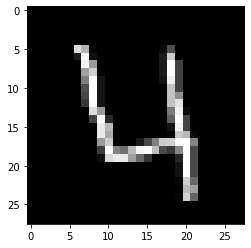

In [4]:
def drawimg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawimg(df.iloc[3,1:].to_numpy())

In [5]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()

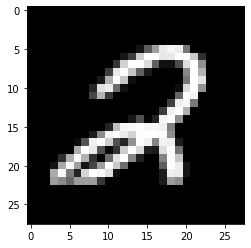

In [7]:
drawimg(x_train[4])

In [8]:
x_train.shape

(33600, 784)

# Applying PCA

In [25]:
# 1 Data Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train.shape)
print(x_test.shape)

(33600, 300)
(8400, 300)


0.9999999999999983

In [10]:
def myPCA(X,n_components):
    covar=np.dot(X.T,X)
    U,S,V=np.linalg.svd(covar)
    Ured=U[:,:n_components]
    Z = np.dot(X,Ured)
    return Z

In [11]:
x_train=myPCA(x_train,300)
x_test=myPCA(x_test,300)

In [12]:
from collections import Counter
def predictone(x_train,y_train,x_test,k):
    distances = []
    for i in range(len(x_train)):
        distance = ((x_train[i,:]-x_test)**2).sum()
        distances.append([distance,i])
    distances=sorted(distances)
    targets=[]
    for i in range(k):
        index_of_training_data=distances[i][1]
        targets.append(y_train[index_of_training_data])
    predictedans=Counter(targets).most_common(1)[0][0]
    return predictedans

def predict(x_train,y_train,x_test_data,k):
    predictions=[]
    for x_test in x_test_data:
        predictions.append(predictone(x_train,y_train,x_test,k))
    return predictions

In [13]:
y_pred=predict(x_train,y_train,x_test,3)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.18428571428571427
[[  3 266   2  13  16   2  24 346  26 115]
 [566   4 266  11  29  22  14   3  44   2]
 [ 13  60  83 233  82  83  62 113  60  71]
 [ 36  33 105 357  11 118  11  74  96  22]
 [ 15  44  28   2 437  57  19   5 116 104]
 [ 11  32  16 128 184  53   0  54 128 150]
 [ 30  73 105   3 140   1 275  16  49 149]
 [499   7  28  82  35  90  11  37  81  29]
 [ 25  27  34 117  73 166   1  21 220  84]
 [174  32  57  13 225  70   6  10 146  79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       813
           1       0.01      0.00      0.01       961
           2       0.11      0.10      0.10       860
           3       0.37      0.41      0.39       863
           4       0.35      0.53      0.42       827
           5       0.08      0.07      0.07       756
           6       0.65      0.33      0.44       841
           7       0.05      0.04      0.05       899
           8       0.23      0.29      0.25       768
        

In [33]:
# for submission to kaggle
# X=X.to_numpy()
# Y=Y.to_numpy()
dftest=pd.read_csv('test.csv')
Bigtestx=dftest.to_numpy()
# ImageId,Label
print(X.shape,Y.shape,Bigtestx.shape)
print(type(X),type(Y),type(Bigtestx))

kaggle_y_pred=predict(X,Y,Bigtestx,5)

(42000, 784) (42000,) (28000, 784)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [43]:
cols=["ImageId","Label"]
y_pred=[]
for i in range(len(kaggle_y_pred)):
    lst=[]
    lst.append(i+1)
    lst.append(kaggle_y_pred[i])
    y_pred.append(lst)
submission=pd.DataFrame(y_pred,columns=cols)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
filename = 'kaggle Digits Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)